In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3

In [ ]:
conn = sqlite3.connect('airbnb_database.db')
cursor = conn.cursor()

User Gender

In [ ]:
cursor.execute("""SELECT COUNT(id) FROM train_user WHERE gender = 'MALE';""")
maleUser = cursor.fetchall()
cursor.execute("""SELECT COUNT(id) FROM train_user WHERE gender = "FEMALE";""")
femaleUser = cursor.fetchall()

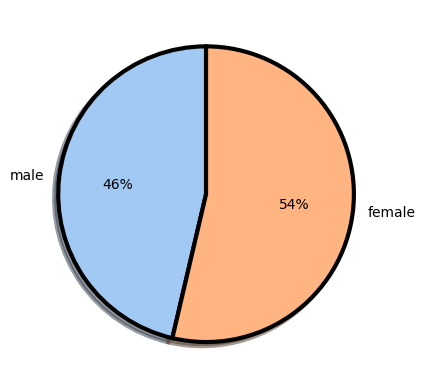

In [ ]:
# concatenate the two lists
userGender = [maleUser[0][0], femaleUser[0][0]]
keys = ['male','female']
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')[0:2]

wedgeprops = {"linewidth":3, "edgecolor":"black"}
# plotting data on chart
plt.pie(userGender, labels=keys, colors=palette_color, autopct='%.0f%%', shadow=True,wedgeprops=wedgeprops, startangle=90)
plt.title('User Gender Distribution')
  
# displaying chart
plt.show()


User Age

In [ ]:
# Get the user age information from the database
cursor.execute("""SELECT age, COUNT(id) FROM train_user WHERE age BETWEEN 0 AND 80 GROUP BY age ORDER BY age;""")
userAge = cursor.fetchall()

# create one list of age and one list of count
age = []
count = []
for i in range(1, len(userAge)):
    age.append(userAge[i][0])
    count.append(userAge[i][1])


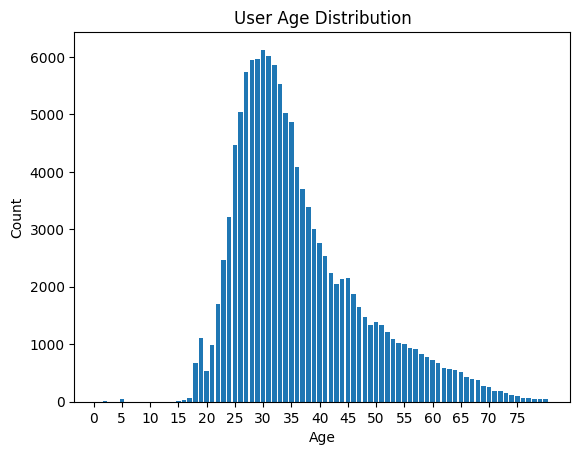

In [ ]:
# plot a bar plot of the age and count
plt.bar(age, count)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(0, 80, 5))
plt.title('User Age Distribution')
plt.show()


User Language

In [ ]:
# Get the user lanuage information from the database
cursor.execute("""SELECT language, COUNT(language) AS lg_num FROM train_user GROUP BY language ORDER BY lg_num;""")
userLanguage = cursor.fetchall()

# create one list of language and one list of count
language = []
languageCount = []
for i in range(1, len(userLanguage)):
    language.append(userLanguage[i][0])
    languageCount.append(userLanguage[i][1])

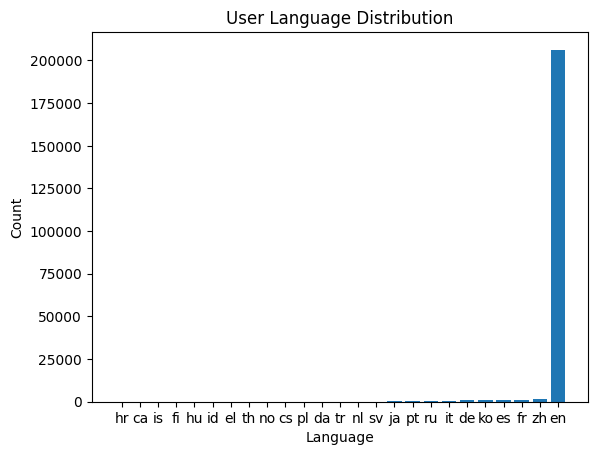

In [ ]:
# plot a bar chart of the language and count
plt.bar(language, languageCount)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('User Language Distribution')
plt.show()

In [ ]:
# Number of users who speak English
cursor.execute("""SELECT SUM(CASE WHEN language = "en" THEN 1 END) FROM train_user ;""")
num_en = cursor.fetchall()[0][0]

# Number of users who doesn't speak English
cursor.execute("""SELECT SUM(CASE WHEN language <> "en" THEN 1 END) FROM train_user ;""")
num_non_en = cursor.fetchall()[0][0]

print(num_en)
print(num_non_en)

206314
7138


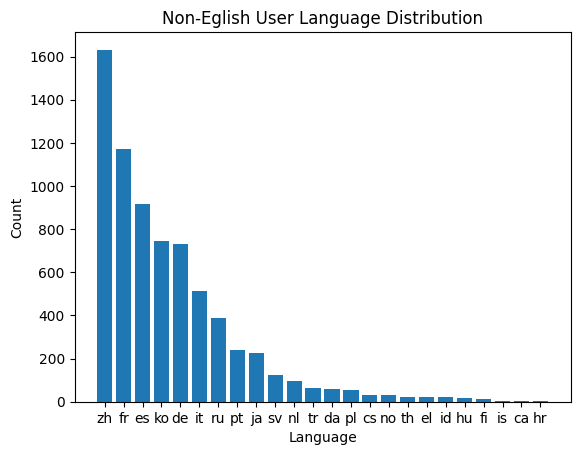

In [ ]:
# Get the user age information from the database
cursor.execute("""SELECT language, COUNT(language) AS lg_num FROM train_user WHERE language <> "en" GROUP BY language ORDER BY lg_num DESC;""")
non_english_user = cursor.fetchall()

# create one list of age and one list of count
language = []
languageCount = []
for i in range(len(non_english_user)-1):
    language.append(non_english_user[i][0])
    languageCount.append(non_english_user[i][1])

 # plot a bar chart of the language and count
plt.bar(language, languageCount)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Non-Eglish User Language Distribution')
plt.show()   

Country Destination

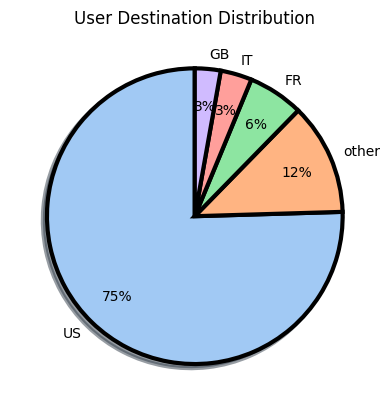

In [ ]:


# create one list of age and one list of count
country = []# Get the user age information from the database
cursor.execute("""SELECT country_destination, COUNT(id) AS cd_num FROM train_user WHERE country_destination <> "NDF" GROUP BY country_destination ORDER BY cd_num DESC;""")
userDestination = cursor.fetchall()
destinationCount = []
for i in range(len(userDestination)-1):
    country.append(userDestination[i][0])
    destinationCount.append(userDestination[i][1])

# plot a pie chart of the country and count
palette_color = sns.color_palette('pastel')[0:5]
plt.pie(destinationCount[0:5], labels=country[0:5], colors=palette_color, autopct='%.0f%%', pctdistance = 0.75, shadow=True,wedgeprops=wedgeprops, startangle=90)
plt.title('User Destination Distribution')

# displaying chart
plt.show()
